### Part 0. Import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import itertools
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

In [3]:
from RAGE import RAGE
from XY_ORACLE import XY_ORACLE
from XY_STATIC import XY_STATIC
from RAGE_opt import RAGE_opt
from RAGE_center import RAGE_center

In [4]:
import logging

for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
    
logging.basicConfig(level=logging.CRITICAL, format='%(message)s')

logging.debug("This is a debug message and should not appear.")
logging.critical("This is a critical message and should appear.")


This is a critical message and should appear.


### Part 1. Synthetic Dataset

In [52]:
# def transductive_problem_instance(d, rad):
#     assert d > 2, "d needs to be greater than 2"
    
#     theta_star = np.zeros((d, 1))
#     theta_star[0, 0] = 2.0
#     X = np.eye(2*d)
#     Z = np.eye(2*d)[0:d,:]
#     Zp = np.cos(rad)*np.eye(2*d)[0:d,:]+np.sin(rad)*np.eye(2*d)[d:2*d,:] 
#     Z = np.vstack((Z, Zp))
    
#     theta_star = np.zeros((2*d, 1))
#     theta_star[0, 0] = 1
#     theta_star[1, 0] = 0.8
#     theta_star[2, 0] = 0.5
#     theta_star[3, 0] = 0.3
#     # for i in range(1, d+1):
#     #     theta_star[i, 0] = 1 - (i * 1.0 / 2 * d)
    
#     return X, Z, theta_star

In [12]:
def transductive_problem_instance(d, rad):
    
    theta_star = np.zeros((d, 1))
    theta_star[0, 0] = 2.0
    X = np.eye(2*d)
    Z = np.eye(2*d)[0:d,:]
    Zp = np.cos(rad)*np.eye(2*d)[0:d,:]+np.sin(rad)*np.eye(2*d)[d:2*d,:] 
    Z = np.vstack((Z, Zp))
    
    theta_star = np.zeros((2*d, 1))
    theta_star[0, 0] = 1
    
    return X, Z, theta_star

In [13]:
count = 20
delta = 0.05
rad = .1
sweep = [20, 40, 60, 80]
factor = 50
d = 80

X, Z, theta_star = transductive_problem_instance(d, rad)
print(X.shape)
print(Z.shape)
print(theta_star.shape)


(160, 160)
(160, 160)
(160, 1)


In [6]:
true_reward = Z@theta_star
print(true_reward.shape)
print(true_reward.max())
print(true_reward.min())

(160, 1)
1.0
0.0


In [7]:
true_reward[true_reward > 0]
# plt.hist(true_reward[true_reward > 0])

array([1.        , 0.99500417])

### Part 2. Run RAGE

In [63]:
rage_instance = RAGE(X, theta_star, factor, delta, Z)

In [64]:
rage_instance.algorithm(42, var = False)

DEBUG:root:design status 42, 100, 0.09730022261577716, 60.77062552768055
DEBUG:root:design status 42, 200, 0.051250340515229295, 55.964444890313814
DEBUG:root:design status 42, 300, 0.033788948007280876, 52.9412924121531
DEBUG:root:design status 42, 400, 0.024427371362854673, 50.62000318246222
DEBUG:root:design status 42, 500, 0.020570703479696452, 50.404895443767415
DEBUG:root:design status 42, 600, 0.016104541180240642, 49.63280745009118
DEBUG:root:design status 42, 700, 0.01456477938070062, 49.505103690551394
DEBUG:root:design status 42, 800, 0.01203682712845056, 49.127594647697244
DEBUG:root:design status 42, 900, 0.010853779123984945, 49.15545157345498
CRITICAL:root:


CRITICAL:root:finished phase 1
INFO:root:design [0.04498213 0.04510341 0.04522683 0.04533322 0.04543961 0.045546
 0.04565877 0.04381395 0.04391609 0.04401822 0.04408206 0.04413951
 0.0442608  0.04440549 0.04576942 0.0442076  0.044414   0.04453528
 0.04467146 0.04491404 0.00501319 0.00503447 0.00505575 0.00507064
 0.

In [65]:
rage_instance.N

109852

### Part 3. Run XY Static

In [66]:
xy_static_instance = XY_STATIC(X, theta_star, delta, Z)

In [67]:
xy_static_instance.algorithm(42)

CRITICAL:root:Succeeded? True
CRITICAL:root:Sample complexity 2959553


In [68]:
xy_static_instance.N

2959553

### Part 4. Run Oracle

In [56]:
oracle_instance = XY_ORACLE(X, theta_star, delta, Z)

In [57]:
oracle_instance.algorithm(42)

INFO:root:num samples 2
INFO:root:allocation [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0]
INFO:root:num samples 2
INFO:root:allocation [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
INFO:root:num samples 2
INFO:root:allocation [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0]
INFO:root:num samples 2
INFO:root:allocation [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
INFO:root:num samples 3
INFO:root:allocation [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
INFO:root:num samples 3
INFO:root:allocation [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
INFO:root:num samples 4
INFO:root:allocation [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0]
INFO:root:num samples 5
INFO:root:allocation [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 

In [58]:
oracle_instance.N

40766

### Part 5. Run RAGE Opt

In [90]:
rage_opt_instance = RAGE_opt(X, theta_star, factor, delta, Z)


In [89]:
rage_opt_instance.algorithm(42)

Succeeded? True
Sample complexity 109295


In [91]:
rage_opt_instance.algorithm(100)

Succeeded? True
Sample complexity 106248


In [92]:
rage_opt_instance.N

106248

### Part 6. Run RAGE Center

In [51]:
count = 20
delta = 0.05
rad = .1
sweep = [20, 40, 60, 80]
factor = 50
d = 20

X, Z, theta_star = transductive_problem_instance(d, rad)
print(X.shape)
print(Z.shape)
print(theta_star.shape)

(40, 40)
(40, 40)
(40, 1)


In [14]:
rage_center_instance = RAGE_center(X, theta_star, factor, delta, Z)

In [15]:
rage_center_instance.algorithm(250)

Enter optimal allocation ...



  0%|          | 0/4999 [00:00<?, ?it/s]

design status 250, 2, 0.8976714061884625, 473.94059420286777
design status 250, 4, 0.70157921733886, 1579.3053807005513
design status 250, 6, 0.6063816782353069, 3315.4977342865022
design status 250, 8, 0.5428848603652302, 5681.920880824476
design status 250, 10, 0.49614811171835677, 8677.977982192117
design status 250, 12, 0.45979032376385826, 12303.072164179704
design status 250, 14, 0.43043400866657744, 16556.606529319663
design status 250, 16, 0.40607682957972124, 21437.984163882607
design status 250, 18, 0.3854402532675645, 26946.608142120942
  0%|          | 18/4999 [00:00<00:27, 178.31it/s]design status 250, 20, 0.36766268349741454, 33081.88152903932
design status 250, 22, 0.3521388606627883, 39843.2073823035
design status 250, 24, 0.338429220830319, 47229.98875361443
design status 250, 26, 0.3262056896883518, 55241.62868972763
design status 250, 28, 0.315217728426509, 63877.530233231686
design status 250, 30, 0.3052702377627008, 73137.09642315572
design status 250, 32, 0.296208

Enter optimal allocation ...



  0%|          | 0/4999 [00:00<?, ?it/s]design status 250, 2, 0.8976714061884629, 0.00672087704901657
design status 250, 4, 0.2480938087343339, 0.004169230351727752
design status 250, 6, 0.07237039496935448, 0.0031204100401103795
design status 250, 8, 0.031103000321339436, 0.0028773095384268667
design status 250, 10, 0.016307505562171958, 0.00280092889775923
design status 250, 12, 0.04911070168219068, 0.0031668077830614297
design status 250, 14, 0.030371952286122376, 0.0029830723681147217
design status 250, 16, 0.02014902904934546, 0.0028803031330014396
design status 250, 18, 0.014082986457096172, 0.002819874092767217
  0%|          | 20/4999 [00:00<00:28, 176.41it/s]
finished phase 2
round sample count 16000
total sample count 198226
Size of active arms 2


Enter optimal allocation ...



  0%|          | 0/4999 [00:00<?, ?it/s]design status 250, 2, 0.8976714061884629, 0.00672087704901657
design status 250, 4, 0.2480938087343339, 0.004169230351727752
design status 250, 6, 0.07237039496935448, 0.0031204100401103795
design status 250, 8, 0.031103000321339436, 0.0028773095384268667
design status 250, 10, 0.016307505562171958, 0.00280092889775923
design status 250, 12, 0.04911070168219068, 0.0031668077830614297
design status 250, 14, 0.030371952286122376, 0.0029830723681147217
design status 250, 16, 0.02014902904934546, 0.0028803031330014396
design status 250, 18, 0.014082986457096172, 0.002819874092767217
design status 250, 20, 0.01024627416094826, 0.002784407970106074
  0%|          | 20/4999 [00:00<00:27, 183.50it/s]
finished phase 3
round sample count 16000
total sample count 214226
Size of active arms 2


Enter optimal allocation ...



  0%|          | 0/4999 [00:00<?, ?it/s]design status 250, 2, 0.8976714061884629, 0.00672087704901657
design status 250, 4, 0.2480938087343339, 0.004169230351727752
design status 250, 6, 0.07237039496935448, 0.0031204100401103795
design status 250, 8, 0.031103000321339436, 0.0028773095384268667
design status 250, 10, 0.016307505562171958, 0.00280092889775923
design status 250, 12, 0.04911070168219068, 0.0031668077830614297
design status 250, 14, 0.030371952286122376, 0.0029830723681147217
design status 250, 16, 0.02014902904934546, 0.0028803031330014396
design status 250, 18, 0.014082986457096172, 0.002819874092767217
design status 250, 20, 0.01024627416094826, 0.002784407970106074
  0%|          | 20/4999 [00:00<00:27, 182.85it/s]
finished phase 4
round sample count 16000
total sample count 230226
Size of active arms 2


Enter optimal allocation ...



  0%|          | 0/4999 [00:00<?, ?it/s]design status 250, 2, 0.8976714061884629, 0.00672087704901657
design status 250, 4, 0.2480938087343339, 0.004169230351727752
design status 250, 6, 0.07237039496935448, 0.0031204100401103795
design status 250, 8, 0.031103000321339436, 0.0028773095384268667
design status 250, 10, 0.016307505562171958, 0.00280092889775923
design status 250, 12, 0.04911070168219068, 0.0031668077830614297
design status 250, 14, 0.030371952286122376, 0.0029830723681147217
design status 250, 16, 0.02014902904934546, 0.0028803031330014396
design status 250, 18, 0.014082986457096172, 0.002819874092767217
design status 250, 20, 0.01024627416094826, 0.002784407970106074
  0%|          | 20/4999 [00:00<00:27, 183.21it/s]
finished phase 5
round sample count 16000
total sample count 246226
Size of active arms 2


Enter optimal allocation ...



  0%|          | 0/4999 [00:00<?, ?it/s]design status 250, 2, 0.8976714061884629, 0.00672087704901657
design status 250, 4, 0.2480938087343339, 0.004169230351727752
design status 250, 6, 0.07237039496935448, 0.0031204100401103795
design status 250, 8, 0.031103000321339436, 0.0028773095384268667
design status 250, 10, 0.016307505562171958, 0.00280092889775923
design status 250, 12, 0.04911070168219068, 0.0031668077830614297
design status 250, 14, 0.030371952286122376, 0.0029830723681147217
design status 250, 16, 0.02014902904934546, 0.0028803031330014396
design status 250, 18, 0.014082986457096172, 0.002819874092767217
design status 250, 20, 0.01024627416094826, 0.002784407970106074
  0%|          | 20/4999 [00:00<00:27, 182.61it/s]
finished phase 6
round sample count 16000
total sample count 262226
Size of active arms 1
Succeeded? True
Sample complexity 262226


In [101]:
rage_center_instance.algorithm(42)

Succeeded? True
Sample complexity 53683


In [102]:
rage_center_instance.N

53683

In [103]:
rage_center_instance.success

True

### Part 7. Run Toy Dataset 1 Benchmarking

In [104]:
count = 20
delta = 0.05
rad = .1
sweep = [20, 40, 60, 80]
factor = 50
seeds = [42, 123, 789]

In [106]:
rage_dict = {}
xy_static_dict = {}
oracle_dict = {}
rage_opt_dict = {}
rage_center_dict = {}

for d in sweep:
    X, Z, theta_star = transductive_problem_instance(d, rad)
    rage_dict[d] = []
    xy_static_dict[d] = []
    oracle_dict[d] = []
    rage_opt_dict[d] = []
    rage_center_dict[d] = []
    
    for seed in seeds:
        print(d, seed)
        rage_instance = RAGE(X, theta_star, factor, delta, Z)
        rage_instance.algorithm(seed)
        rage_dict[d].append((rage_instance.success, rage_instance.N))
        
        xy_static_instance = XY_STATIC(X, theta_star, delta, Z)
        xy_static_instance.algorithm(seed)
        xy_static_dict[d].append((xy_static_instance.success, xy_static_instance.N))
        
        oracle_instance = XY_ORACLE(X, theta_star, delta, Z)
        oracle_instance.algorithm(seed)
        oracle_dict[d].append((oracle_instance.success, oracle_instance.N))
        
        rage_opt_instance = RAGE_opt(X, theta_star, factor, delta, Z)
        rage_opt_instance.algorithm(seed)
        rage_opt_dict[d].append((rage_opt_instance.success, rage_opt_instance.N))
        
        rage_center_instance = RAGE_center(X, theta_star, factor, delta, Z)
        rage_center_instance.algorithm(seed)
        rage_center_dict[d].append((rage_center_instance.success, rage_center_instance.N))
        

20 42





finished phase 1
round sample count 70833
total sample count 70833
active arms [0, 20]
rho 49.023766103473946






finished phase 2
round sample count 4000
total sample count 74833
active arms [0, 20]
rho 0.011090894072773293






finished phase 3
round sample count 4000
total sample count 78833
active arms [0, 20]
rho 0.011090894072773293






finished phase 4
round sample count 4000
total sample count 82833
active arms [0, 20]
rho 0.011090894072773293






finished phase 5
round sample count 5296
total sample count 88129
active arms [0, 20]
rho 0.011090894072773293






finished phase 6
round sample count 21723
total sample count 109852
active arms [0]
rho 0.011090894072773293



Succeeded? True
Sample complexity 109852
Succeeded? True
Sample complexity 2959553
Succeeded? True
Sample complexity 40766
Succeeded? True
Sample complexity 109295
Succeeded? True
Sample complexity 53683


20 123





finished phase 1
round sample count 70833
total sample count 70833
active arms [0, 20]
rho 49.023766103473946






finished phase 2
round sample count 4000
total sample count 74833
active arms [0, 20]
rho 0.011090894072773293






finished phase 3
round sample count 4000
total sample count 78833
active arms [0, 20]
rho 0.011090894072773293






finished phase 4
round sample count 4000
total sample count 82833
active arms [0, 20]
rho 0.011090894072773293






finished phase 5
round sample count 5296
total sample count 88129
active arms [0, 20]
rho 0.011090894072773293






finished phase 6
round sample count 21723
total sample count 109852
active arms [0]
rho 0.011090894072773293



Succeeded? True
Sample complexity 109852
Succeeded? True
Sample complexity 2959553
Succeeded? True
Sample complexity 27849
Succeeded? True
Sample complexity 106248
Succeeded? True
Sample complexity 53683


20 789





finished phase 1
round sample count 70833
total sample count 70833
active arms [0, 20]
rho 49.023766103473946






finished phase 2
round sample count 4000
total sample count 74833
active arms [0, 20]
rho 0.011090894072773293






finished phase 3
round sample count 4000
total sample count 78833
active arms [0, 20]
rho 0.011090894072773293






finished phase 4
round sample count 4000
total sample count 82833
active arms [0, 20]
rho 0.011090894072773293






finished phase 5
round sample count 5296
total sample count 88129
active arms [0, 20]
rho 0.011090894072773293






finished phase 6
round sample count 21723
total sample count 109852
active arms [0]
rho 0.011090894072773293



Succeeded? True
Sample complexity 109852
Succeeded? True
Sample complexity 5393745
Succeeded? True
Sample complexity 33694
Succeeded? True
Sample complexity 106248
Succeeded? True
Sample complexity 53683


40 42





finished phase 1
round sample count 162242
total sample count 162242
active arms [0, 40]
rho 99.7886174256694






finished phase 2
round sample count 8000
total sample count 170242
active arms [0, 40]
rho 0.011091836046563865






finished phase 3
round sample count 8000
total sample count 178242
active arms [0, 40]
rho 0.011091836046563865






finished phase 4
round sample count 8000
total sample count 186242
active arms [0, 40]
rho 0.011091836046563865






finished phase 5
round sample count 8000
total sample count 194242
active arms [0, 40]
rho 0.011091836046563865






finished phase 6
round sample count 23781
total sample count 218023
active arms [0]
rho 0.011091836046563865



Succeeded? True
Sample complexity 218023
Succeeded? True
Sample complexity 9830099
Succeeded? True
Sample complexity 40766
Succeeded? True
Sample complexity 214561
Succeeded? True
Sample complexity 119144


40 123





finished phase 1
round sample count 162242
total sample count 162242
active arms [0, 40]
rho 99.7886174256694






finished phase 2
round sample count 8000
total sample count 170242
active arms [0, 40]
rho 0.011091836046563865






finished phase 3
round sample count 8000
total sample count 178242
active arms [0, 40]
rho 0.011091836046563865






finished phase 4
round sample count 8000
total sample count 186242
active arms [0, 40]
rho 0.011091836046563865






finished phase 5
round sample count 8000
total sample count 194242
active arms [0, 40]
rho 0.011091836046563865






finished phase 6
round sample count 23781
total sample count 218023
active arms [0]
rho 0.011091836046563865



Succeeded? True
Sample complexity 218023
Succeeded? True
Sample complexity 5393785
Succeeded? True
Sample complexity 33694
Succeeded? True
Sample complexity 217921
Succeeded? True
Sample complexity 119144


40 789





finished phase 1
round sample count 162242
total sample count 162242
active arms [0, 40]
rho 99.7886174256694






finished phase 2
round sample count 8000
total sample count 170242
active arms [0, 40]
rho 0.011091836046563865






finished phase 3
round sample count 8000
total sample count 178242
active arms [0, 40]
rho 0.011091836046563865






finished phase 4
round sample count 8000
total sample count 186242
active arms [0, 40]
rho 0.011091836046563865






finished phase 5
round sample count 8000
total sample count 194242
active arms [0, 40]
rho 0.011091836046563865






finished phase 6
round sample count 23781
total sample count 218023
active arms [0]
rho 0.011091836046563865



Succeeded? True
Sample complexity 218023
Succeeded? True
Sample complexity 5393785
Succeeded? True
Sample complexity 40766
Succeeded? True
Sample complexity 214561
Succeeded? True
Sample complexity 119144


60 42





finished phase 1
round sample count 259261
total sample count 259261
active arms [0, 60]
rho 149.7119230811481






finished phase 2
round sample count 12000
total sample count 271261
active arms [0, 60]
rho 0.011092150172178919






finished phase 3
round sample count 12000
total sample count 283261
active arms [0, 60]
rho 0.011092150172178919






finished phase 4
round sample count 12000
total sample count 295261
active arms [0, 60]
rho 0.011092150172178919






finished phase 5
round sample count 12000
total sample count 307261
active arms [0, 60]
rho 0.011092150172178919






finished phase 6
round sample count 24984
total sample count 332245
active arms [0]
rho 0.011092150172178919



Succeeded? True
Sample complexity 332245
Succeeded? True
Sample complexity 17915320
Succeeded? True
Sample complexity 49323
Succeeded? True
Sample complexity 323794
Succeeded? True
Sample complexity 187425


60 123





finished phase 1
round sample count 259261
total sample count 259261
active arms [0, 60]
rho 149.7119230811481






finished phase 2
round sample count 12000
total sample count 271261
active arms [0, 60]
rho 0.011092150172178919






finished phase 3
round sample count 12000
total sample count 283261
active arms [0, 60]
rho 0.011092150172178919






finished phase 4
round sample count 12000
total sample count 295261
active arms [0, 60]
rho 0.011092150172178919






finished phase 5
round sample count 12000
total sample count 307261
active arms [0, 60]
rho 0.011092150172178919






finished phase 6
round sample count 24984
total sample count 332245
active arms [0]
rho 0.011092150172178919



Succeeded? True
Sample complexity 332245
Succeeded? True
Sample complexity 17915320
Succeeded? True
Sample complexity 40766
Succeeded? True
Sample complexity 323558
Succeeded? True
Sample complexity 187425


60 789





finished phase 1
round sample count 259261
total sample count 259261
active arms [0, 60]
rho 149.7119230811481






finished phase 2
round sample count 12000
total sample count 271261
active arms [0, 60]
rho 0.011092150172178919






finished phase 3
round sample count 12000
total sample count 283261
active arms [0, 60]
rho 0.011092150172178919






finished phase 4
round sample count 12000
total sample count 295261
active arms [0, 60]
rho 0.011092150172178919






finished phase 5
round sample count 12000
total sample count 307261
active arms [0, 60]
rho 0.011092150172178919






finished phase 6
round sample count 24984
total sample count 332245
active arms [0]
rho 0.011092150172178919



Succeeded? True
Sample complexity 332245
Succeeded? True
Sample complexity 9830139
Succeeded? True
Sample complexity 49323
Succeeded? True
Sample complexity 320791
Succeeded? True
Sample complexity 187425


80 42





finished phase 1
round sample count 370079
total sample count 370079
active arms [0, 80]
rho 204.8199734935052






finished phase 2
round sample count 16000
total sample count 386079
active arms [0]
rho 0.011092307260205336



Succeeded? True
Sample complexity 386079
Succeeded? True
Sample complexity 17915360
Succeeded? True
Sample complexity 59677
Succeeded? True
Sample complexity 449506
Succeeded? True
Sample complexity 262226


80 123





finished phase 1
round sample count 370079
total sample count 370079
active arms [0, 80]
rho 204.8199734935052






finished phase 2
round sample count 16000
total sample count 386079
active arms [0]
rho 0.011092307260205336



Succeeded? True
Sample complexity 386079
Succeeded? True
Sample complexity 17915360
Succeeded? True
Sample complexity 72205
Succeeded? True
Sample complexity 450373
Succeeded? True
Sample complexity 262226


80 789





finished phase 1
round sample count 370079
total sample count 370079
active arms [0, 80]
rho 204.8199734935052






finished phase 2
round sample count 16000
total sample count 386079
active arms [0]
rho 0.011092307260205336



Succeeded? True
Sample complexity 386079
Succeeded? True
Sample complexity 17915360
Succeeded? True
Sample complexity 59677
Succeeded? True
Sample complexity 443560
Succeeded? True
Sample complexity 262226


In [107]:
print(rage_dict)
print(xy_static_dict)
print(oracle_dict)
print(rage_opt_dict)
print(rage_center_dict)

{20: [(True, 109852), (True, 109852), (True, 109852)], 40: [(True, 218023), (True, 218023), (True, 218023)], 60: [(True, 332245), (True, 332245), (True, 332245)], 80: [(True, 386079), (True, 386079), (True, 386079)]}
{20: [(True, 2959553), (True, 2959553), (True, 5393745)], 40: [(True, 9830099), (True, 5393785), (True, 5393785)], 60: [(True, 17915320), (True, 17915320), (True, 9830139)], 80: [(True, 17915360), (True, 17915360), (True, 17915360)]}
{20: [(True, 40766), (True, 27849), (True, 33694)], 40: [(True, 40766), (True, 33694), (True, 40766)], 60: [(True, 49323), (True, 40766), (True, 49323)], 80: [(True, 59677), (True, 72205), (True, 59677)]}
{20: [(True, 109295), (True, 106248), (True, 106248)], 40: [(True, 214561), (True, 217921), (True, 214561)], 60: [(True, 323794), (True, 323558), (True, 320791)], 80: [(True, 449506), (True, 450373), (True, 443560)]}
{20: [(True, 53683), (True, 53683), (True, 53683)], 40: [(True, 119144), (True, 119144), (True, 119144)], 60: [(True, 187425), 

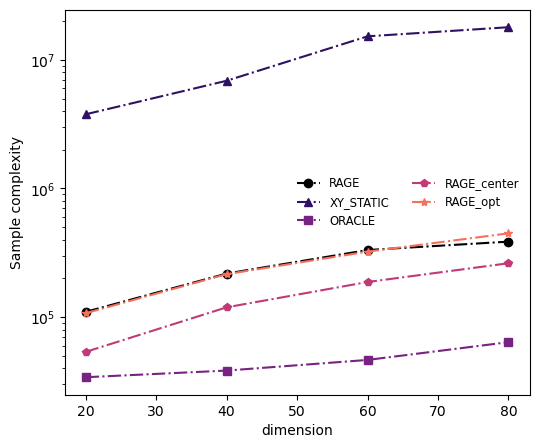

In [151]:
# Predefined color-blind friendly colors
colors = plt.get_cmap('magma')
markers = ['o', '^', 's', 'p', '*']

num_lines = 5
color_indices = np.linspace(0.0, 0.7, num_lines)

plt.figure(figsize=(6, 5))
for idx, (method_dict, label) in enumerate(zip([rage_dict, xy_static_dict, oracle_dict, rage_center_dict, rage_opt_dict],
                              ['RAGE', 'XY_STATIC', 'ORACLE', 'RAGE_center', 'RAGE_opt'])):
    means = [np.mean([n for _, n in method_dict[d]]) for d in sweep]
    color = colors(color_indices[idx])
    plt.plot(sweep, means, label=label, color=color, marker=markers[idx % len(markers)], linestyle="dashdot")

plt.xlabel('dimension')
plt.ylabel('Sample complexity')
plt.yscale('log')
# plt.title('Average Sample Complexity Across Methods')

plt.legend(frameon=False, ncol=2, fontsize="small")
plt.show()


### Part 8. Synthetic Dataset for Toy Dataset 2 

In [298]:
def transductive_problem_instance(d, rad):
    
    theta_star = np.zeros((d, 1))
    theta_star[0, 0] = 2.0
    X = np.eye(2*d)
    Z = np.eye(2*d)[0:d,:]
    Zp = np.cos(rad)*np.eye(2*d)[0:d,:]+np.sin(rad)*np.eye(2*d)[d:2*d,:] 
    Z = np.vstack((Z, Zp))
    
    theta_star = np.zeros((2*d, 1))
    theta_star[0, 0] = 1
    
    return X, Z, theta_star

In [299]:
X, Z, theta_star = transductive_problem_instance(10, 0.1)
print(X.shape)
print(Z.shape)
print(theta_star.shape)

(20, 20)
(20, 20)
(20, 1)


In [5]:
import numpy as np
from scipy.stats import truncnorm

def generate_unit_vector(d):
    """Generates a unit vector in d-dimensional space."""
    vector = np.random.randn(d)
    vector /= np.linalg.norm(vector)
    return vector

def generate_theta_star(d):
    """Generates theta_star as a unit norm vector drawn from a standard normal distribution."""
    return generate_unit_vector(d)

def generate_sorted_rewards(n):
    """Generates n sorted rewards from a normal distribution centered at 0.5, truncated between 0 and 1."""
    lower, upper = 0, 1
    mu, sigma = 0.5, 0.15  # Adjust sigma to control the spread
    rewards = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma).rvs(n)
    return np.sort(rewards)

def reverse_engineer_z(rewards, theta_star):
    """Reverse engineers Z vectors from rewards using arc cosine for angles and orthogonal completion."""
    d = len(theta_star)
    n = len(rewards)
    Z = np.zeros((n, d))
    for i in range(n):
        angle = np.arccos(rewards[i])
        # Initial Z_i aligned with theta_star
        Z[i] = np.cos(angle) * theta_star
        # Generate a random orthogonal component
        orthogonal_component = np.random.randn(d)
        orthogonal_component -= orthogonal_component.dot(theta_star) * theta_star  # Make orthogonal to theta_star
        orthogonal_component /= np.linalg.norm(orthogonal_component)  # Normalize
        Z[i] += np.sin(angle) * orthogonal_component  # Add orthogonal component
        Z[i] /= np.linalg.norm(Z[i])  # Ensure Z_i is a unit vector
    return Z

def transductive_problem_instance(d, n, seed = 42):
    np.random.seed(seed)
    theta_star = generate_theta_star(d)
    rewards = generate_sorted_rewards(2 * n)  # Generate double for Z
    Z = reverse_engineer_z(rewards, theta_star)
    indices = np.random.choice(2 * n, n, replace=False)  # Randomly select half of Z to be X
    X = Z[indices]
    return X, Z, theta_star, rewards[indices]


In [13]:
# Example usage
d = 200  # Dimension of the space
n = 2000  # Number of vectors/rewards for X (20 for Z)
X, Z, theta_star, X_rewards = transductive_problem_instance(d, n)
theta_star  = theta_star[:, None]
np.linalg.norm(X[2])
print(X.shape)
print(Z.shape)
print(theta_star.shape)

(2000, 200)
(4000, 200)
(200, 1)


0.9785133591724997 0.15776471326740713


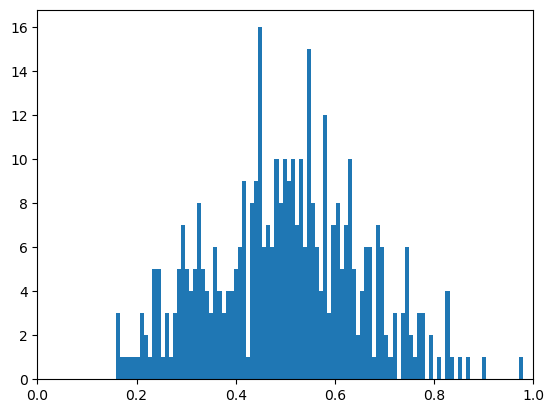

In [19]:
print((Z @ theta_star).max(), (Z @ theta_star).min())
plt.hist(Z @ theta_star, bins = 100)
plt.xlim(0, 1)
plt.show()

0.9785133591724997 0.1737305386615179


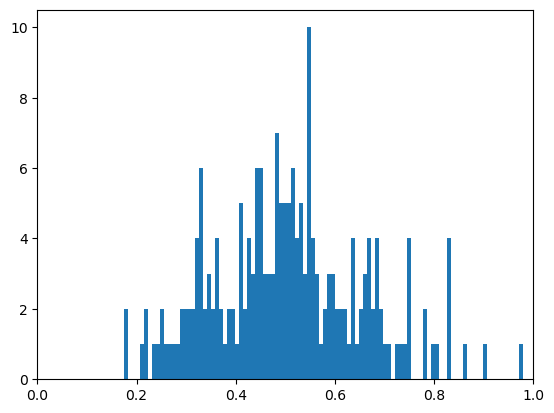

In [20]:
print((X @ theta_star).max(), (X @ theta_star).min())
plt.hist(X @ theta_star, bins = 100)
plt.xlim(0, 1)
plt.show()

In [14]:
factor = 50
delta = 0.05
rage_center_instance = RAGE_center(X, theta_star, factor, delta, Z)
rage_center_instance.algorithm(250)

Enter optimal allocation ...



  0%|          | 0/4999 [00:00<?, ?it/s]

ValueError: operands could not be broadcast together with shapes (2000,200) (2000,) 

In [314]:
oracle_instance = XY_ORACLE(X, theta_star, delta, Z)
oracle_instance.algorithm(250)

Succeeded? True
Sample complexity 5787722
